In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [ ]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [ ]:
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
628,2014,KIA,SOUL ECO Dynamics,STATION WAGON - SMALL,2.0,4,A6,X,9.7,7.8,8.8,32,202
93,2014,BMW,428i xDRIVE COUPE,COMPACT,2.0,4,A8,Z,10.6,7.2,9.1,31,209
47,2014,AUDI,R8,TWO-SEATER,5.2,10,M6,Z,21.1,13.8,17.8,16,409
848,2014,NISSAN,MAXIMA,MID-SIZE,3.5,6,AV,Z,12.3,9.1,10.9,26,251
196,2014,CHEVROLET,CORVETTE,TWO-SEATER,6.2,8,M7,Z,13.7,8.2,11.2,25,258


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
cdf = df[["ENGINESIZE" , "CYLINDERS" , "FUELCONSUMPTION_COMB" , "CO2EMISSIONS"]]
cdf.head()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


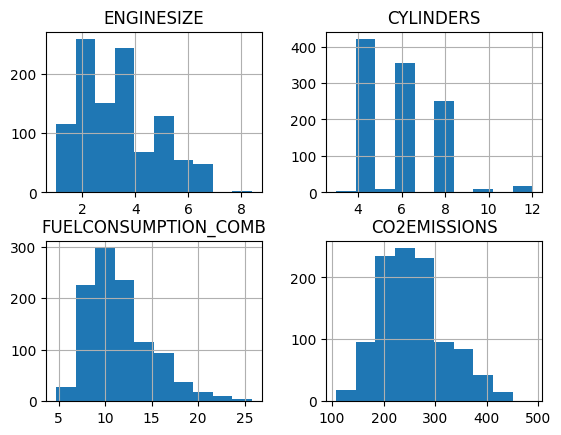

In [ ]:
viz = cdf
viz.hist()
plt.show()


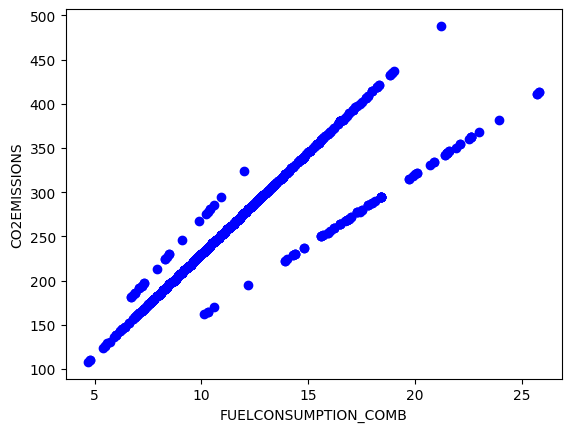

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB , cdf.CO2EMISSIONS , color = "blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

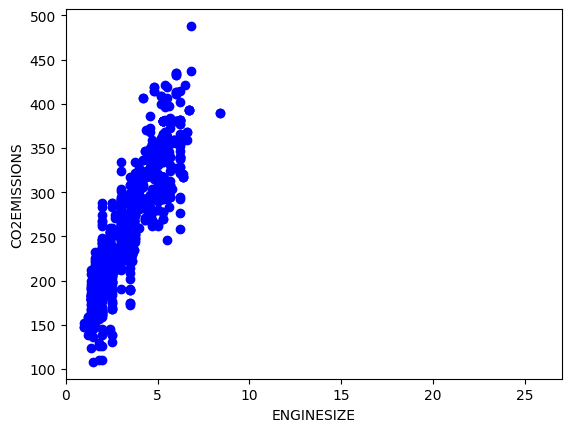

In [ ]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS , color = "blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.xlim(0,27)
plt.show()

Text(0, 0.5, 'CO2EMISSIONS')

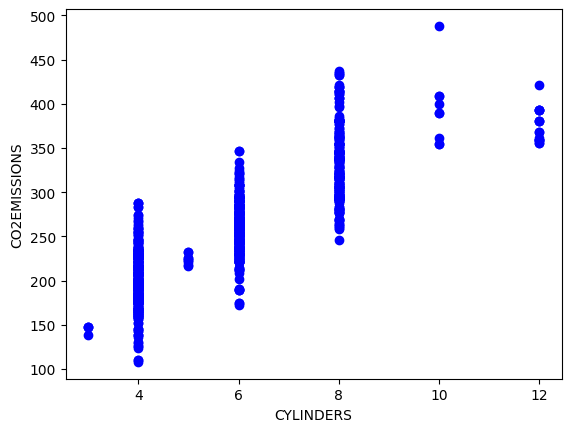

In [ ]:
plt.scatter(cdf.CYLINDERS , cdf.CO2EMISSIONS , color = "blue")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")

In [ ]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)



In [ ]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

TypeError: 'tuple' object is not callable

In [ ]:

regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1,1) , y_train)

print("Coefficients: ",regressor.coef_[0])
print("Intercept: ",regressor.intercept_)

Coefficients:  38.992978724434074
Intercept:  126.28970217408721


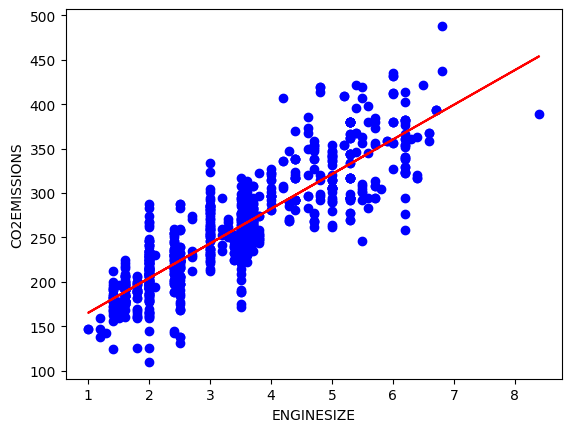

In [ ]:
plt.scatter(X_train , y_train , color = "blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.plot(X_train , regressor.coef_ * X_train + regressor.intercept_, "-r")

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

y_test_ = regressor.predict(X_test.reshape(-1,1))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test , y_test_))
print("Mean sqaured error: %.2f" % mean_squared_error(y_test , y_test_))
print("R2-score: %.2f" % r2_score(y_test , y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test , y_test_)))

Mean absolute error: 24.10
Mean sqaured error: 985.94
R2-score: 0.76
Root mean squared error: 31.40


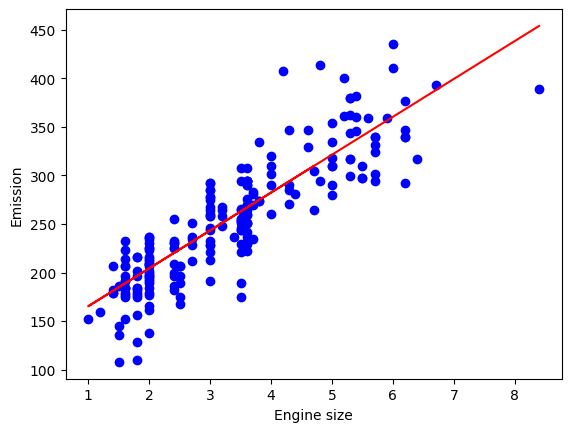

In [ ]:

plt.scatter(X_test , y_test , color = "blue")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.plot(X_test , y_test_ , "-r")

In [ ]:
X = df['FUELCONSUMPTION_COMB'].to_numpy()
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)



In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1,1) , y_train)

print("Coefficients: ",regr.coef_[0])
print("Intercept: ",regr.intercept_)

Coefficients:  16.180900781199195
Intercept:  69.10302617988444


In [ ]:
y_test_  = regr.predict(X_test.reshape(-1,1))

In [ ]:
print("Mean absolute error: %.2f" % mean_absolute_error(y_test , y_test_))
print("Mean sqaured error: %.2f" % mean_squared_error(y_test , y_test_))
print("R2-score: %.2f" % r2_score(y_test , y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test , y_test_)))

Mean absolute error: 20.44
Mean sqaured error: 797.43
R2-score: 0.81
Root mean squared error: 28.24
